# Marketing Camapign Dataset for Customer Retention


### Dataset Description

https://www.kaggle.com/davinwijaya/customer-retention


recency - months since last purchase

history - value of the historical purchases in Euros

used_discount - indicates if the customer used a discount before

used_bogo - indicates if the customer used a buy one get one before

zip_code - class of the zip code as Suburban/Urban/Rural

is_referral - indicates if the customer was acquired from referral channel

channel - channels that the customer using, Phone/Web/Multichannel

offer - the offers sent to the customers, Discount/But One Get One/No Offer

conversion - customer conversion(buy or not)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', None)

import warnings
warnings.simplefilter('ignore')

In [15]:
train = pd.read_csv('marketing_promotion_campaign.csv')

In [16]:
train.head(10)

,id,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
6,7,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
7,8,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,9,675.07,1,1,Rural,1,Phone,Discount,0
9,10,10,32.84,0,1,Urban,1,Web,Buy One Get One,0


In [17]:
ID_COL, TARGET_COL = 'id', 'conversion'

In [18]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 64000 samples and 10 variables

The dataset contains 8 features


In [19]:
train[TARGET_COL].value_counts(normalize=True)

0    0.853219
1    0.146781
Name: conversion, dtype: float64

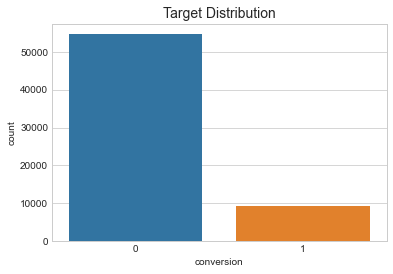

In [20]:
_ = sns.countplot(train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             64000 non-null  int64  
 1   recency        64000 non-null  int64  
 2   history        64000 non-null  float64
 3   used_discount  64000 non-null  int64  
 4   used_bogo      64000 non-null  int64  
 5   zip_code       64000 non-null  object 
 6   is_referral    64000 non-null  int64  
 7   channel        64000 non-null  object 
 8   offer          64000 non-null  object 
 9   conversion     64000 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.9+ MB


In [22]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

id               0.0
recency          0.0
history          0.0
used_discount    0.0
used_bogo        0.0
zip_code         0.0
is_referral      0.0
channel          0.0
offer            0.0
conversion       0.0
dtype: float64

In [23]:
train.nunique()

id               64000
recency             12
history          34833
used_discount        2
used_bogo            2
zip_code             3
is_referral          2
channel              3
offer                3
conversion           2
dtype: int64

In [24]:
train.columns

Index(['id', 'recency', 'history', 'used_discount', 'used_bogo', 'zip_code',
       'is_referral', 'channel', 'offer', 'conversion'],
      dtype='object')

In [25]:
cat_cols = ['recency',
 'used_discount',
 'used_bogo',
 'zip_code',
 'is_referral',
 'channel',
 'offer']

In [26]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['history']

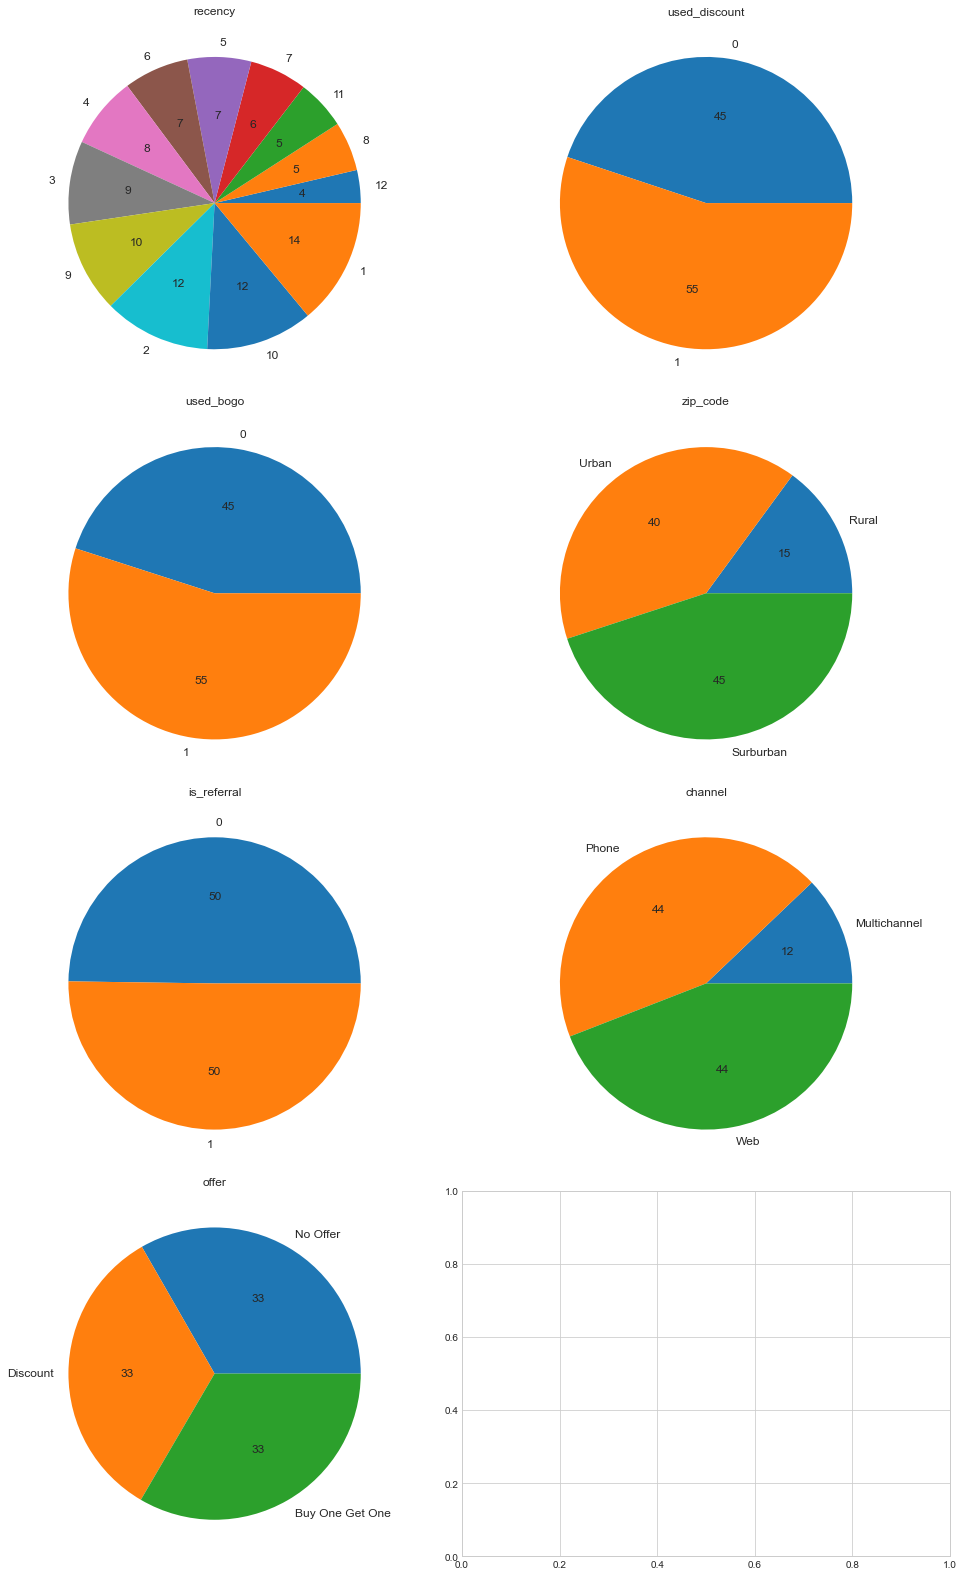

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

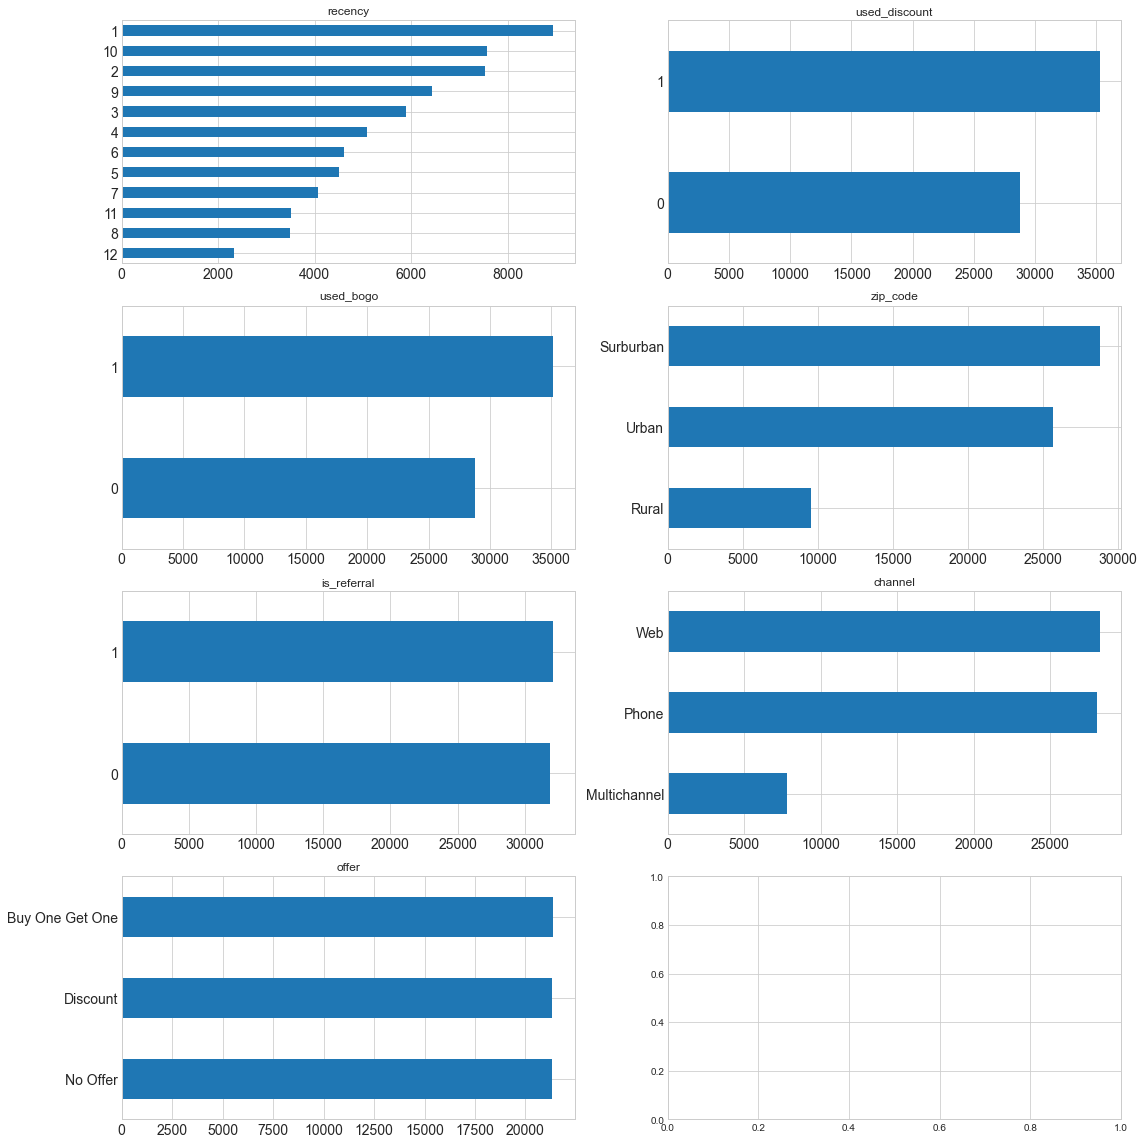

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

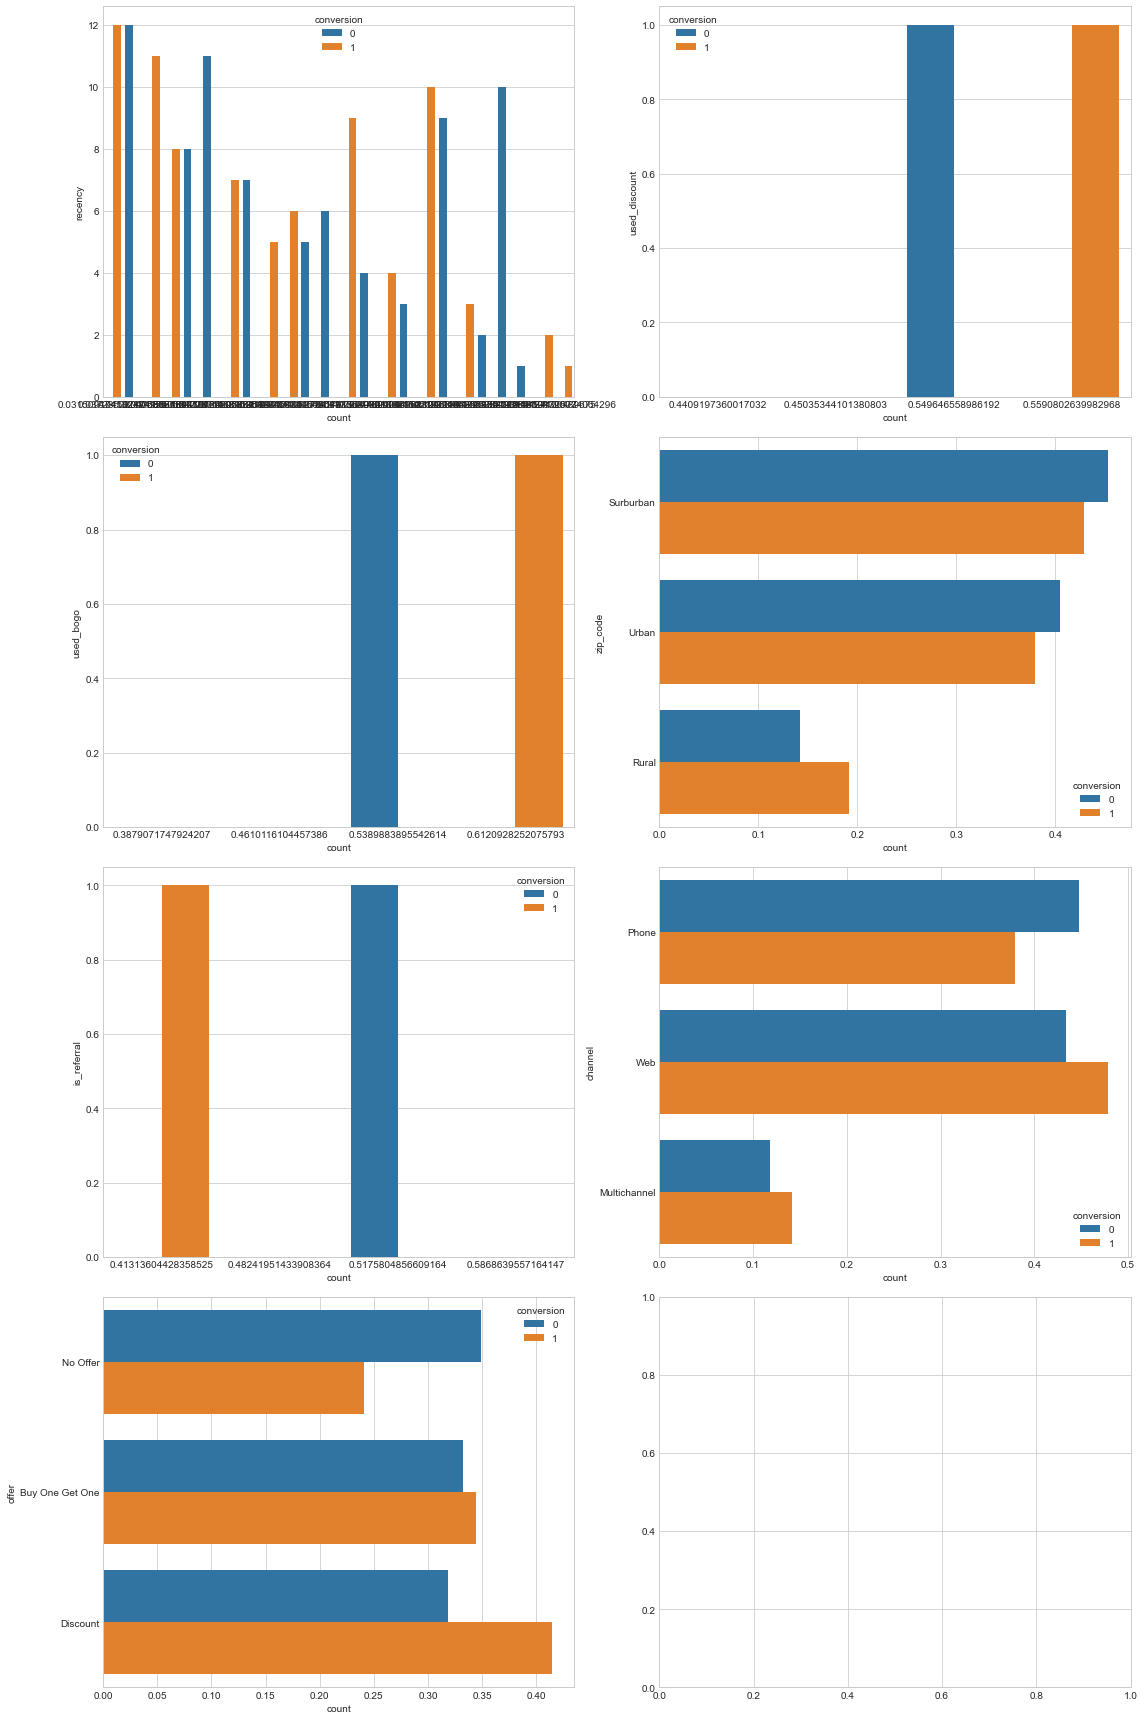

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

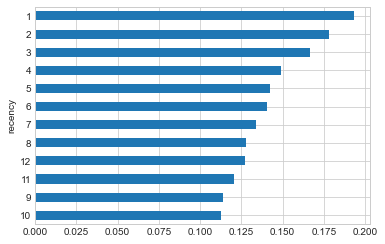

In [33]:
_ = train.groupby('recency')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

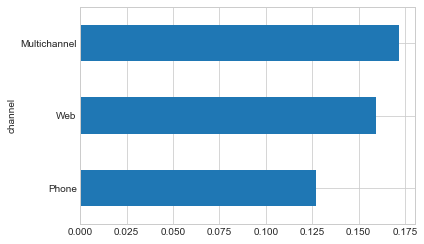

In [35]:
_ = train.groupby('channel')[TARGET_COL].mean().sort_values().plot(kind = 'barh')

KeyError: "None of [Index([('history',)], dtype='object')] are in the [columns]"

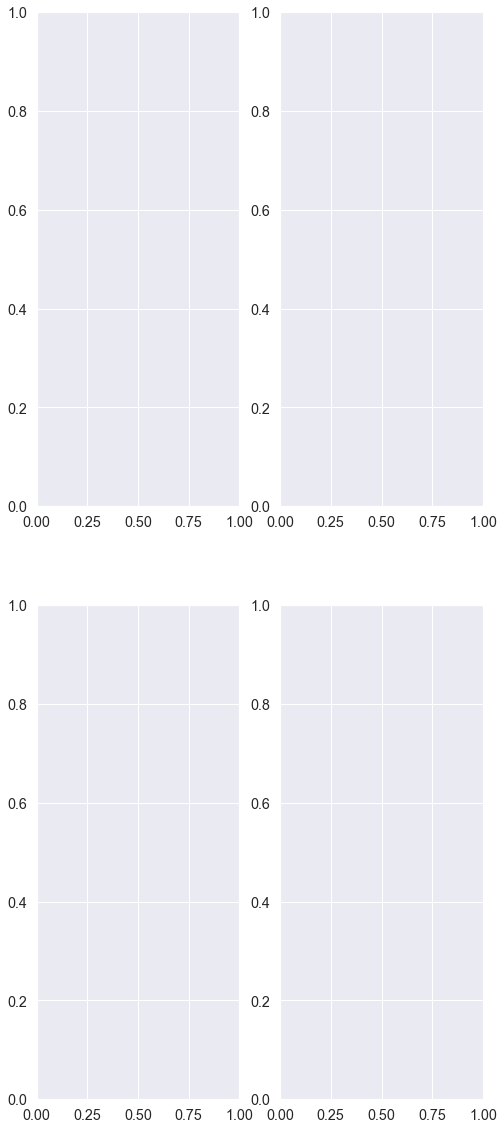

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(8, 20))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    _ = train[[num_cols]].boxplot(ax=axes[i], vert=False)

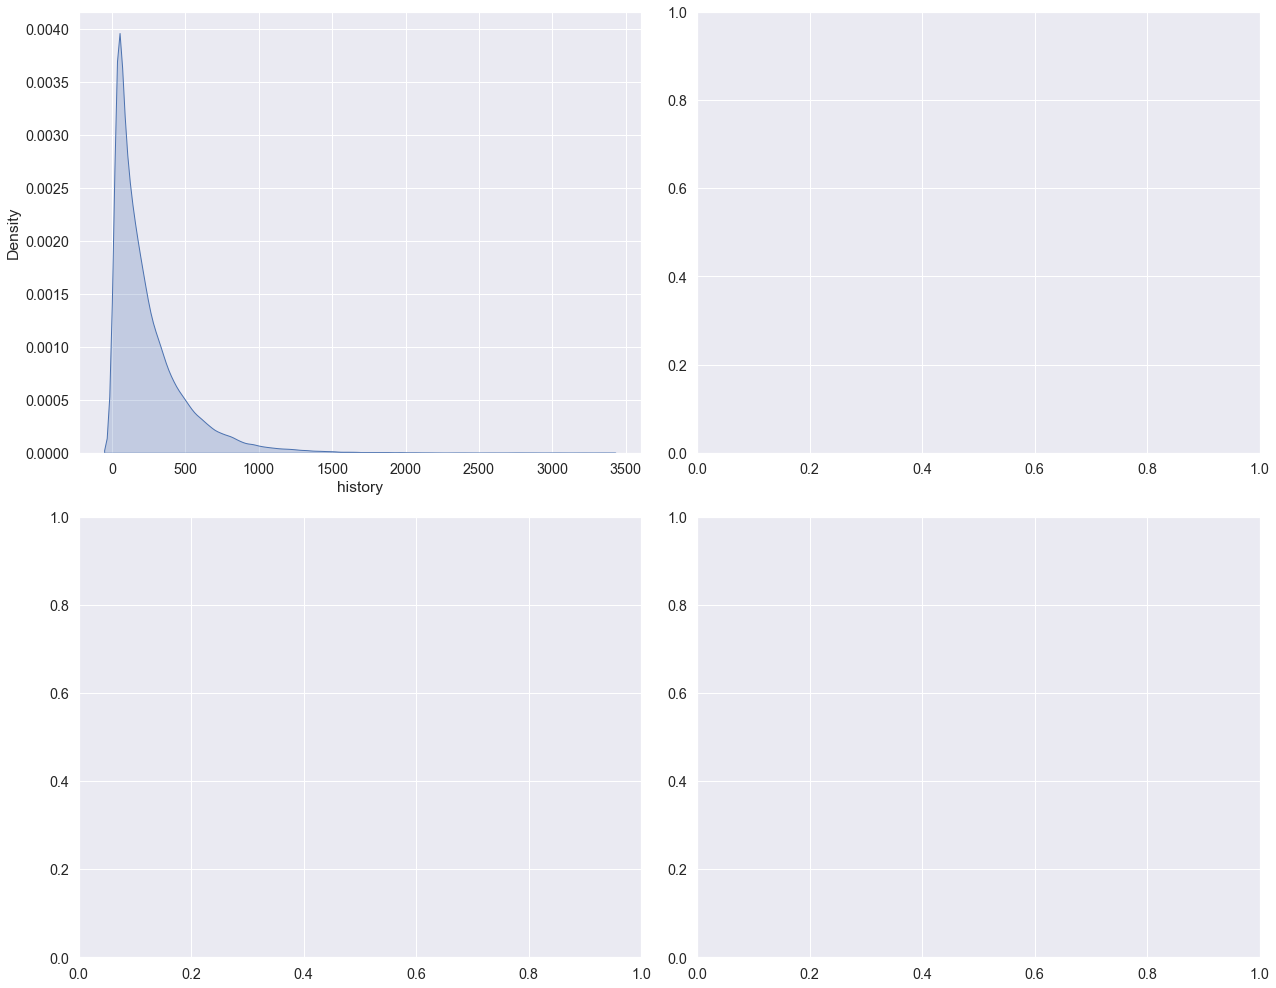

In [43]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

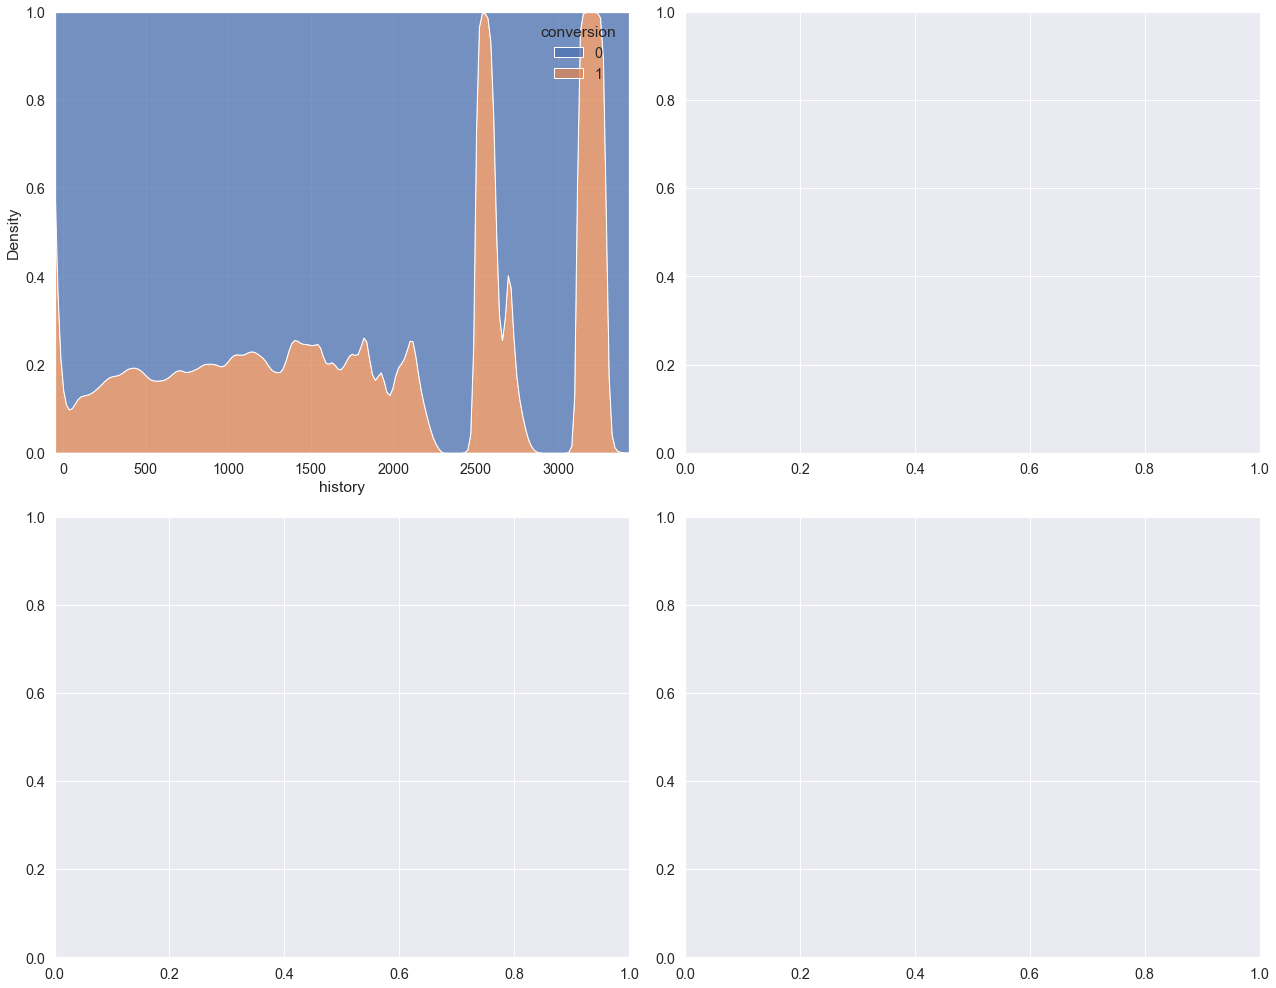

In [52]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

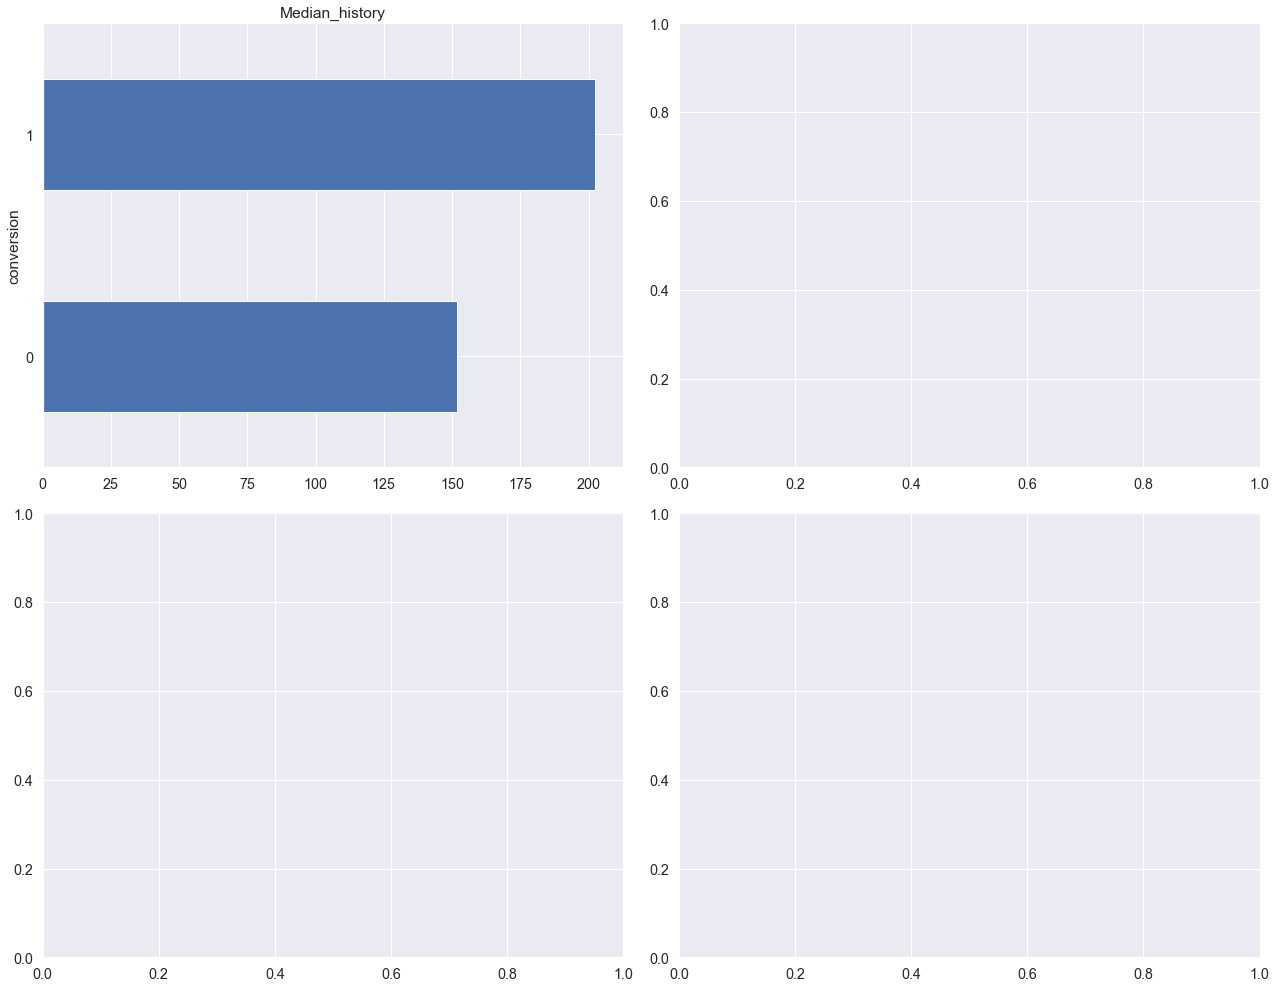

In [53]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
    plot = train.groupby(TARGET_COL)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])
plt.tight_layout()

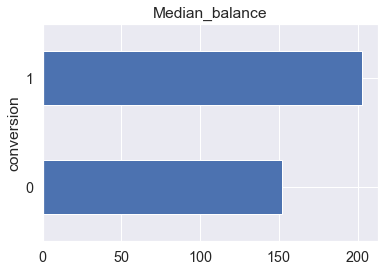

In [56]:
_ = train.groupby(TARGET_COL)['history'].median().plot(kind = 'barh', title=f'Median_history')

In [58]:
target = train[TARGET_COL]
target.value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

In [61]:
preds_target = np.zeros(len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.85321875
F1 score is: 0.0


In [63]:
np.random.seed(2)

preds_target = np.random.choice([0, 1], size=len(train))

accuracy = accuracy_score(target, preds_target)
f1 = f1_score(target, preds_target)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.50328125
F1 score is: 0.22963214268404983
